In [1]:
%matplotlib inline

from gensim.models import Word2Vec, KeyedVectors

In [2]:
data_path = "data/"
w2v_model = "GoogleNews-vectors-negative300-SLIM.bin/GoogleNews-vectors-negative300-SLIM.bin"
w2v_model_path = data_path + w2v_model

In [3]:
word2vec = KeyedVectors.load_word2vec_format(w2v_model_path, binary=True)
word2vec.init_sims()


In [92]:
fastt_model_path = "/Users/aliosha/Downloads/wiki-news-300d-1M-subword.vec"

fastt = KeyedVectors.load_word2vec_format(w2v_model_path, binary=True)
fastt.init_sims()

In [4]:
def get_related_terms(token, topn=10, model=word2vec):
    """
    look up the topn most similar terms to token
    and print them as a formatted list
    """
    for word, similarity in model.most_similar(positive=[token], topn=topn):

        print(u'{:20} {}'.format(word, round(similarity, 3)))

In [5]:
get_related_terms("hotel")

hotels               0.771
Hotel                0.739
motel                0.662
Radisson             0.645
Sheraton             0.622
Marriott             0.609
guesthouse           0.605
Ramada               0.601
Hotels               0.596
resort               0.58


In [6]:
# get_related_terms("hotwel", model=fastt)
# fastt.most_similar(positive=['hotwel'])

In [7]:
get_related_terms("happy")

glad                 0.741
pleased              0.663
ecstatic             0.663
overjoyed            0.66
thrilled             0.651
satisfied            0.644
proud                0.636
delighted            0.627
disappointed         0.627
excited              0.625


In [9]:
import pandas as pd
csv_path = "/Users/aliosha/Downloads/contentcreation_searchqueryreport.csv"
df = pd.read_csv(csv_path)
df

,query,keyword
0,cheaphotels,+cheap +hotels
1,hotels deals,hotel deals
2,cheaphotels,cheap hotels
3,cheap hots,+cheap +hotels
4,bcompare hitels,compare hotels
5,hotels compare,compare hotels
6,last min hotel deals,last minute hotel deals
7,cheap hotel,cheap hotels
8,compate hotels,compare hotels
9,last minute hotwls,+last +minute +hotels


In [11]:
from wordsegment import load, segment
load()

In [14]:
for i, words in enumerate(df['query'][:10]):
    print(words, segment(words), df['keyword'][i])

cheaphotels ['cheap', 'hotels'] +cheap +hotels
hotels deals ['hotels', 'deals'] hotel deals
cheaphotels ['cheap', 'hotels'] cheap hotels
cheap hots ['cheap', 'hots'] +cheap +hotels
bcompare hitels ['b', 'compare', 'hitels'] compare hotels
hotels compare ['hotels', 'compare'] compare hotels
last min hotel deals ['last', 'min', 'hotel', 'deals'] last minute hotel deals
cheap hotel ['cheap', 'hotel'] cheap hotels
compate hotels ['compat', 'e', 'hotels'] compare hotels
last minute hotwls ['last', 'minute', 'hotwls'] +last +minute +hotels


In [8]:
# get_related_terms('hotwls')

In [28]:
words = word2vec.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

In [16]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word): 
    "Probability of `word`."
    # use inverse of rank as proxy
    # returns 0 if the word isn't in the dictionary
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
        letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [24]:
correction('hotwls')

'hotels'

In [27]:
for i, words in enumerate(df['query'][:10]):
    print(words, segment(words), correction(words), list(map(correction, segment(words))), df['keyword'][i])

cheaphotels ['cheap', 'hotels'] cheaphotels ['cheap', 'hotels'] +cheap +hotels
hotels deals ['hotels', 'deals'] hotels deals ['hotels', 'deals'] hotel deals
cheaphotels ['cheap', 'hotels'] cheaphotels ['cheap', 'hotels'] cheap hotels
cheap hots ['cheap', 'hots'] cheapshots ['cheap', 'hots'] +cheap +hotels
bcompare hitels ['b', 'compare', 'hitels'] bcompare hitels ['b', 'compare', 'hotels'] compare hotels
hotels compare ['hotels', 'compare'] hotels compare ['hotels', 'compare'] compare hotels
last min hotel deals ['last', 'min', 'hotel', 'deals'] last min hotel deals ['last', 'min', 'hotel', 'deals'] last minute hotel deals
cheap hotel ['cheap', 'hotel'] cheap hotel ['cheap', 'hotel'] cheap hotels
compate hotels ['compat', 'e', 'hotels'] compate hotels ['combat', 'e', 'hotels'] compare hotels
last minute hotwls ['last', 'minute', 'hotwls'] last minute hotwls ['last', 'minute', 'hotels'] +last +minute +hotels


In [38]:
for i, words in enumerate(df['query'][:20]):
    if set(list(map(correction, segment(words)))) != set(df['keyword'][i].replace("+", "").split()):
        print(words, list(map(correction, segment(words))), df['keyword'][i])

hotels deals ['hotels', 'deals'] hotel deals
cheap hots ['cheap', 'hots'] +cheap +hotels
bcompare hitels ['b', 'compare', 'hotels'] compare hotels
last min hotel deals ['last', 'min', 'hotel', 'deals'] last minute hotel deals
cheap hotel ['cheap', 'hotel'] cheap hotels
compate hotels ['combat', 'e', 'hotels'] compare hotels
last minute holiday ['last', 'minute', 'holiday'] last minute holidays
compare hotel ['compare', 'hotel'] compare hotels
hotel compare ['hotel', 'compare'] compare hotels
hotel compare ['hotel', 'compare'] +compare +hotels
hotel last minute ['hotel', 'last', 'minute'] +last +minute +hotels
last miute hotels ['last', 'mi', 'ute', 'hotels'] last minute hotels
hptel deala ['hotel', 'deal', 'at'] hotel deals


In [40]:
correction('miute'), segment('miute')

('minute', ['mi', 'ute'])

In [13]:
def word_algebra(add=[], subtract=[], topn=4):
    """
    combine the vectors associated with the words provided
    in add= and subtract=, look up the topn most similar
    terms to the combined vector, and print the result(s)
    """
    answers = word2vec.most_similar(positive=add, negative=subtract, topn=topn)
    
    for term, similarity in answers:
        print( term)

In [14]:
word_algebra(add=['king', 'woman'], subtract=['man'])

queen
monarch
princess
prince


In [16]:
word_algebra(add=['sushi', 'germany'], subtract=['japan'])

sashimi
schnitzels
fondues
burger


In [47]:
word_algebra(add=['doctor', 'woman'], subtract=['man'])

gynecologist
nurse
doctors
physician


In [48]:
word_algebra(add=['doctor', 'man'], subtract=['woman'])

physician
doctors
surgeon
dentist


In [32]:
word_algebra(add=['anger', 'man'], subtract=['woman'])

frustration


In [33]:
word_algebra(add=['anger', 'woman'], subtract=['man'])

resentment


In [24]:
word_algebra(add=['happy', 'hour'])

hours


In [44]:
word_algebra(add=['lunch', 'breakfast'], subtract=[u'night'])

lunches


In [25]:
word_algebra(add=[u'lunch', u'night'], subtract=[u'day'])

dinner


In [26]:
word_algebra(add=[u'taco', u'chinese'], subtract=[u'mexican'])

noodle


In [27]:
word_algebra(add=[u'bun', u'mexican'], subtract=[u'american'])

buns


In [30]:
word_algebra(add=[u'burger', u'dining', 'fine'])

dinning


In [9]:
get_related_terms('dinning')

dining               0.795
buffet               0.545
dine                 0.516
buffets              0.514
cuisine              0.501
restaurant           0.499
tapas                0.499
alfresco             0.49
bistro               0.489
amenities            0.489


In [31]:
word_algebra(add=[u'breakfast', u'lunch'])

dinner


In [1]:
import fasttext

In [ ]:
model_path = "/Users/aliosha/Downloads/wiki-news-300d-1M-subword.vec"
model = fasttext.load_model(model_path)
print(model.words) # list of words in dictionary
print(model['king']) # get the vector of the word 'king'

In [49]:
import spacy
nlp = spacy.load('en')

In [50]:
king = nlp('king')

In [69]:
king.similarity(nlp("queen"))

0.5411764117257293

In [55]:
nlp('hotwls').vector, len(nlp('hotwls').vector)

(array([ 1.45773888e+00,  2.83182764e+00,  5.46466875e+00,  1.51435220e+00,
        -1.47675800e+00,  3.05633354e+00, -1.53775227e+00, -9.32716802e-02,
         2.35651612e-01, -5.98909557e-02,  6.69459343e-01,  3.19723344e+00,
         8.52864206e-01, -1.30748177e+00,  2.07128286e+00,  2.21523643e+00,
        -9.58889782e-01,  9.92561042e-01, -9.41402555e-01, -1.42283440e+00,
        -7.03022182e-01,  2.78770661e+00,  3.41575956e+00,  2.30089259e+00,
        -3.46750927e+00, -7.17997253e-01, -1.10789466e+00, -5.07554829e-01,
        -1.61082745e-01, -4.48013723e-01, -1.51986390e-01,  4.05589914e+00,
        -4.27406430e-01,  8.70972812e-01, -7.69125164e-01, -2.88991594e+00,
        -1.67702293e+00,  1.10237217e+00, -3.80001736e+00,  1.18974781e+00,
         4.65255231e-01,  4.02796125e+00,  2.30706263e+00, -2.28130507e+00,
        -4.53758001e+00,  6.57765865e-01,  1.84021115e+00, -1.28828511e-01,
         6.55127525e-01, -2.29910135e+00, -3.57927728e+00,  1.37840033e+00,
        -2.3

In [56]:
word2vec['king']

array([ 4.34063822e-02,  1.02627501e-02,  2.96526169e-03,  4.81171533e-02,
       -8.83269403e-03, -1.24498932e-02,  3.85273732e-02, -6.83061704e-02,
        1.76653881e-02,  1.25171900e-01, -8.34479332e-02, -1.04309916e-01,
       -6.12400137e-02, -8.58033169e-03, -5.78751788e-02, -5.85481450e-02,
        1.19451676e-02,  1.79808424e-03,  1.59829706e-02,  4.44158353e-02,
        4.71077040e-02,  3.88638563e-02,  2.05255002e-02,  4.71077040e-02,
        3.48260514e-02, -6.09035306e-02, -8.68127644e-02,  2.06096210e-02,
        1.17769256e-01, -1.07254144e-02,  3.60037461e-02,  2.12825872e-02,
        4.29016575e-02,  1.37958273e-01, -1.11039586e-01,  2.89375894e-02,
        1.34593435e-02,  2.01890152e-03,  2.42268182e-02,  5.95575981e-02,
        4.77806702e-02, -7.97466114e-02,  9.75802392e-02,  4.91266064e-02,
        1.17769256e-01, -8.24384764e-03, -3.78544033e-02,  1.14404419e-02,
       -1.88430808e-02,  5.27858641e-03, -5.58562763e-02,  5.45103438e-02,
       -8.95046368e-02,  

In [57]:
text = nlp("cheap hotwls")

array([ 1.48305893e+00,  9.17569697e-01,  2.25083351e+00,  3.24793518e-01,
       -1.37231588e+00,  1.44559300e+00, -3.10486317e+00,  1.91495144e+00,
        1.05375540e+00, -5.13333082e-02,  4.10352439e-01,  1.80987620e+00,
        1.65341759e+00, -1.18028963e+00, -1.41294253e+00,  1.38764441e-01,
       -2.34269667e+00, -5.50462484e-01, -1.36713350e+00,  5.95221639e-01,
        7.72028208e-01,  8.96306992e-01,  1.30380225e+00,  7.38372564e-01,
       -2.38990426e+00, -1.10300136e+00, -1.19724071e+00,  5.86394906e-01,
        5.59402466e-01,  1.42483914e+00,  8.09802055e-01,  2.73346710e+00,
       -2.06652224e-01,  2.60167551e+00, -1.03043389e+00,  4.77685452e-01,
       -6.84206486e-02,  1.01545691e+00, -2.63299918e+00,  1.55441165e-02,
        2.83278227e-02,  2.82656860e+00,  1.12389207e+00,  8.76602650e-01,
       -2.36223507e+00,  1.60424197e+00, -1.04516745e-01,  4.38667774e-01,
        3.07159114e+00, -6.58004045e-01,  3.49915147e-01, -3.46917391e-01,
       -1.26298451e+00,  

In [106]:
string1 = "cheap hotels"
string2 = "cheap hotwls"
string3 = "cheap hotels1"
string4 = "hotels cheap"


In [109]:
s_string = nlp(string1)


In [113]:
s_string.vector - (s_string[0].vector + s_string[1].vector )

array([-7.24400401e-01, -1.44978452e+00, -9.62124705e-01,  1.00396419e+00,
        2.22012019e+00, -1.30926454e+00,  4.18541956e+00, -3.22751927e+00,
       -1.75598073e+00,  4.47886676e-01, -1.15477586e+00,  8.50250363e-01,
       -7.25000679e-01,  8.98363769e-01,  7.74733901e-01, -5.00217140e-01,
        2.16812134e+00,  2.82184899e-01,  2.72804189e+00, -8.27861309e-01,
       -1.07983196e+00, -1.45915127e+00, -8.03896189e-01,  7.05579042e-01,
        1.60712695e+00,  1.90961838e+00,  1.82620382e+00, -5.32937050e-02,
        1.60932437e-01, -2.78200126e+00, -2.42303610e-02, -2.46942186e+00,
       -1.13469929e-01, -1.39794576e+00,  1.13097656e+00, -1.11616969e+00,
       -3.96536589e-02, -1.61364883e-01,  2.87510252e+00, -2.03913510e-01,
       -6.76552892e-01, -2.94623470e+00, -1.78334594e+00, -9.79373574e-01,
        2.12999725e+00, -8.86242151e-01, -1.80468142e+00, -1.09805489e+00,
       -3.96137714e+00,  1.95453691e+00, -3.95478189e-01,  6.85427248e-01,
        1.70245862e+00, -

In [110]:
list(s_string)

[cheap, hotels]

In [107]:
nlp(string1).similarity(nlp(string4))

0.7560217830159336

In [108]:
nlp(string1).similarity(nlp(string1))

1.0

In [72]:
nlp(string1).similarity(nlp(string2))

0.8183999479043619

In [73]:
nlp(string1).similarity(nlp(string3))

0.5665318250473387

In [115]:
nlp("notawordatall")[0].vector

array([-9.08460975e-01, -5.31806350e-01,  2.47681761e+00, -3.12347651e-01,
        1.97348297e-01,  1.98485875e+00,  1.27508640e-01,  4.18681240e+00,
        1.56251991e+00,  3.13075662e+00,  1.18594468e-02, -2.06893969e+00,
       -1.54176903e+00, -4.51804399e-02, -1.42254066e+00,  1.11544347e+00,
       -3.55837536e+00,  1.93919647e+00, -1.66796374e+00,  2.09506059e+00,
        3.62435532e+00,  2.00719929e+00,  1.33604431e+00,  1.38223171e-04,
       -5.64724565e-01, -3.56601954e+00, -8.71292412e-01,  2.87083209e-01,
       -2.27817988e+00,  1.88740671e+00,  7.24703550e-01,  8.53746653e-01,
       -5.26829958e-02,  6.56317830e-01,  2.30108428e+00,  8.80695343e-01,
       -1.37363291e+00, -1.00352025e+00, -3.14542937e+00,  1.02434373e+00,
       -1.29095876e+00,  2.93496990e+00,  9.02170062e-01,  2.65562963e+00,
       -1.48350000e+00, -1.35267806e+00,  1.30237699e-01, -6.54234886e-02,
       -1.23033345e+00, -1.13042808e+00, -4.25352275e-01, -1.15619659e+00,
       -1.57090127e+00,  

In [10]:
import numpy as np

In [60]:
import langdetect

In [67]:
langdetect.detect_langs('fuhna aeroporika eishthria')

[sq:0.9999961362782334]

### Visualization with t-SNE 
(t-Distributed Stochastic Neighbouring Embedding)

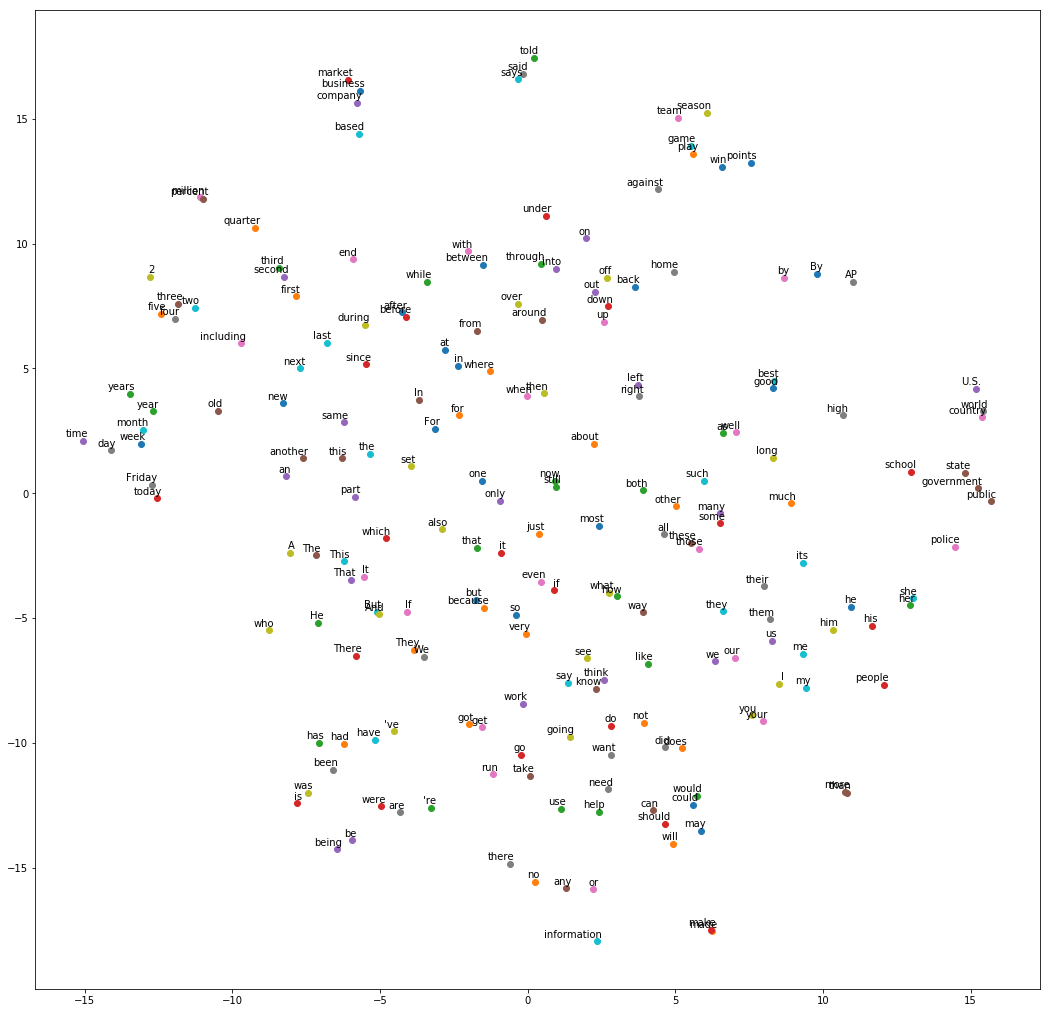

In [12]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# en_model = fastt
en_model = word2vec

# Limit number of tokens to be visualized
limit = 200 
vector_dim = 300

# Getting tokens and vectors
words = []
embedding = np.array([])
i = 0
for i, word in enumerate(en_model.vocab):
    # Break the loop if limit exceeds 
    if i == limit: break

    # Getting token 
    words.append(word)

    # Appending the vectors 
    embedding = np.append(embedding, en_model[word])


# Reshaping the embedding vector 
embedding = embedding.reshape(limit, vector_dim)


def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)


# Creating the tsne plot [Warning: will take time]
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)

low_dim_embedding = tsne.fit_transform(embedding)

# Finally plotting and saving the fig 
plot_with_labels(low_dim_embedding, words)

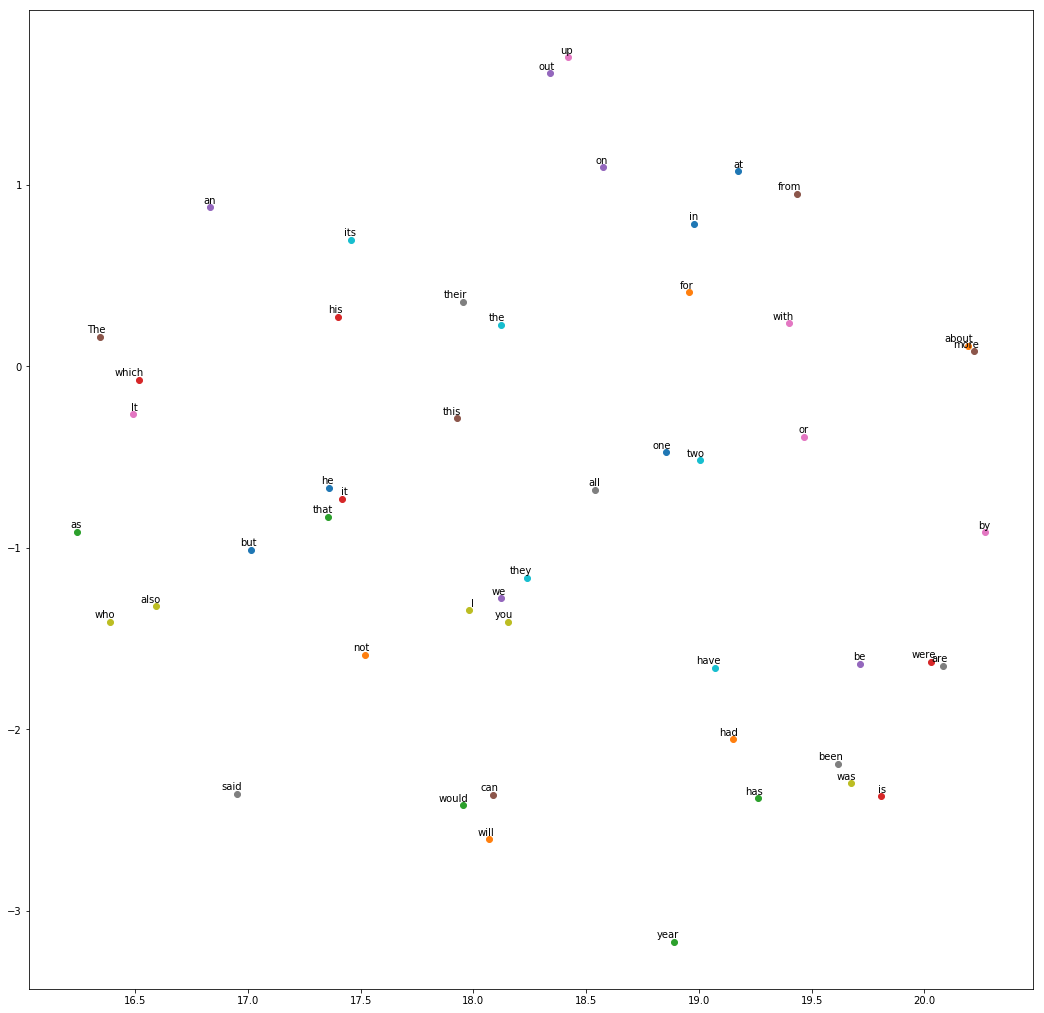

In [105]:
en_model = word2vec
# Creating the tsne plot [Warning: will take time]
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)

low_dim_embedding = tsne.fit_transform(embedding)

# Finally plotting and saving the fig 
plot_with_labels(low_dim_embedding, words)